In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st 
import matplotlib.pyplot as plt

In [209]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [210]:
df = pd.read_csv('/content/gdrive/My Drive/openclassrooms/df_regression.csv')

In [211]:
display(df['Unnamed: 0'])
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

0        0
1        1
2        2
3        3
4        4
      ... 
422    422
423    423
424    424
425    425
426    426
Name: Unnamed: 0, Length: 427, dtype: int64

###dropping energy star score

In [212]:
df.drop(['ENERGYSTARScore'], axis = 1, inplace = True )

In [213]:
df_regression = df.copy()

In [214]:
for i in df_regression.columns:
  print(i)

DataYear
ZipCode
CouncilDistrictCode
Latitude
Longitude
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity
PrimaryPropertyType_Distribution Center
PrimaryPropertyType_Hotel
PrimaryPropertyType_K-12 School
PrimaryPropertyType_Large Office
PrimaryPropertyType_Low-Rise Multifamily
PrimaryPropertyType_Medical Office
PrimaryPropertyType_Mixed Use Property
PrimaryPropertyType_Other
PrimaryPropertyType_Refrigerated Warehouse
PrimaryPropertyType_Residence Hall
PrimaryPropertyType_Retail Store
PrimaryPropertyType_Senior Care Community
PrimaryPropertyType_Small- and Mid-Sized Office
PrimaryPropertyType_Warehouse
ZipCode_98033.0
ZipCode_98101.0
ZipCode_98102.0
ZipCode_98103.0
ZipCode_98104.0
ZipCode_

#Predire Total GHGE emissions


In [215]:
X = df_regression.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
X = X.drop(['GHGEmissionsIntensity'], axis = 1)
X = X.drop(['ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)' ], axis = 1)
Y = df_regression['GHGEmissionsIntensity']


In [216]:
print(X.columns)

Index(['DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       ...
       'SecondLargestPropertyUseType_Non-Refrigerated Warehouse',
       'SecondLargestPropertyUseType_Office',
       'SecondLargestPropertyUseType_Other',
       'SecondLargestPropertyUseType_Other - Education',
       'SecondLargestPropertyUseType_Other - Restaurant/Bar',
       'SecondLargestPropertyUseType_Parking',
       'SecondLargestPropertyUseType_Restaurant',
       'SecondLargestPropertyUseType_Retail Store',
       'SecondLargestPropertyUseType_Self-Storage Facility',
       'SecondLargestPropertyUseType_Supermarket/Grocery Store'],
      dtype='object', length=104)


In [217]:
df_regression['GHGEmissionsIntensity'].describe()

count    427.000000
mean       0.725902
std        0.608899
min       -0.020000
25%        0.250000
50%        0.520000
75%        1.135000
max        2.510000
Name: GHGEmissionsIntensity, dtype: float64

In [218]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3, random_state = 42)
display(X_test)

,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),...,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store
419,2016,47.64779,-122.33352,1993,1.0,1,26263,26263,26263.0,62.200001,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75,2016,47.60765,-122.34097,1909,1.0,6,51218,51218,44913.0,55.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
177,2016,47.61185,-122.34340,1918,1.0,3,38148,38148,37853.0,25.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,2016,47.62224,-122.35850,1970,1.0,5,87178,66762,66747.0,52.299999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
358,2016,47.72900,-122.34473,1990,1.0,4,41704,33120,41704.0,46.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2016,47.70349,-122.33424,1983,1.0,3,24696,18396,18396.0,33.900002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
255,2016,47.66116,-122.34172,1916,1.0,3,31774,31774,19896.0,48.400002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108,2016,47.61460,-122.34217,1952,1.0,4,26670,26670,26670.0,58.200001,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
101,2016,47.61285,-122.34817,1908,1.0,3,28800,28800,21600.0,38.400002,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Regression linéaire ridge, lasso et elasticnet




In [219]:
from sklearn.linear_model import LinearRegression
import math
model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)
print(mae)



0.9570590738169106
0.30726613672578595
0.1598758661705926


In [220]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [221]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)
print(mae)


0.9507459609612418
0.2887443611503127
0.14314038863721149


In [222]:
vec = [0.1 , 0.5, 0.9, 1, 10, 30, 50, 75, 100, 130, 150, 200, 300, 400, 500, 1000, 2000, 10000]

In [223]:
mse_score = []
mae_score = []
adj_r2 = []
for i in vec:
  print(i)
  model = Ridge(alpha=i )
  model.fit(X_train, y_train)
  r_squared = model.score(X_train, y_train)
  adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  adj_r2.append(adjusted_r_squared)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_score.append(mse)
  mae = mean_absolute_error(y_test, y_pred)
  mae_score.append(mae)

0.1
0.5
0.9
1
10
30


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.26377e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


50
75
100
130
150
200
300
400
500
1000
2000
10000


In [224]:
print(mse_score)

[0.09130539088212765, 0.08575162324521564, 0.0836996203155331, 0.08337330609610222, 0.07757754596432972, 0.07217885600397639, 0.06870853162160974, 0.0657224649642639, 0.06359552214840392, 0.061716361843412865, 0.06073159353968827, 0.05886031361275302, 0.056493087634773856, 0.054997965732444865, 0.05392961334172491, 0.05101740858842024, 0.04881515582538931, 0.05249600776593246]


In [225]:
ridge_mse_score = []
ridge_mae_score = []
ridge_adj_r2 = []
from sklearn.model_selection import cross_validate
for i in np.arange(1, 10000, 100):
  print(i)
  model = Ridge(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  ridge_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  ridge_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  ridge_adj_r2.append(np.mean(cv_results['test_r2']))
  




1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901


In [226]:
list_model = ['ridge', 'lasso', 'elasticnet', 'randomforest', 'Xgboost']
best_rmse = []
best_mae = []

In [227]:
ridge_mae = []
for i in ridge_mae_score:
  ridge_mae.append(-i)
ridge_rmse = []
for i in ridge_mse_score:
  ridge_rmse.append(np.sqrt(-i))
ridge_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), ridge_mae, ridge_rmse, ridge_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [228]:
display(ridge_scores_cv)

,alpha,mean absolute error,root_mean_squared_error,rsquared
0,1,0.115918,0.185990,0.910762
1,101,0.094791,0.164734,0.928838
2,201,0.095962,0.165087,0.928456
3,301,0.096882,0.165261,0.928240
4,401,0.097658,0.165394,0.928062
...,...,...,...,...
95,9501,0.136512,0.193662,0.899350
96,9601,0.136730,0.193895,0.899106
97,9701,0.136945,0.194125,0.898864
98,9801,0.137157,0.194354,0.898624


In [229]:
best_rmse.append(min(ridge_rmse))
best_mae.append(min(ridge_mae))

In [230]:

lasso_mse_score = []
lasso_mae_score = []
lasso_adj_r2 = []
for i in vec:
  print(i)
  lasso = Lasso(alpha=i )
  lasso.fit(X_train, y_train)
  r_squared = lasso.score(X_train, y_train)
  adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  lasso_adj_r2.append(adjusted_r_squared)
  y_pred = lasso.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  lasso_mse_score.append(mse)
  mae = mean_absolute_error(y_test, y_pred)
  lasso_mae_score.append(mae)

0.1
0.5
0.9
1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.992e+00, tolerance: 1.147e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e-02, tolerance: 1.147e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e-02, tolerance: 1.147e-02

10
30
50
75
100
130
150
200
300
400
500
1000
2000
10000


In [231]:
print(ridge_adj_r2);
print(lasso_adj_r2)
print(ridge_mse_score)
print(lasso_mse_score)
print(ridge_mae_score)
print(lasso_mae_score)

[0.9107617458071287, 0.9288375233277881, 0.928455568397381, 0.9282395421509001, 0.9280621037086279, 0.9278828535894409, 0.9276887985549978, 0.9274762792152049, 0.9272450960316918, 0.9269963497969302, 0.9267315811151118, 0.9264524139118382, 0.9261604088338797, 0.9258570080196392, 0.925543520271377, 0.9252211238117706, 0.9248908761286054, 0.9245537260681381, 0.9242105259612752, 0.9238620428795106, 0.9235089686779894, 0.9231519287929565, 0.9227914898761886, 0.9224281663974722, 0.9220624263385979, 0.9216946961285799, 0.921325364923103, 0.9209547883283677, 0.9205832916592994, 0.9202111727985134, 0.9198387047167031, 0.919466137704448, 0.9190937013559448, 0.9187216063396875, 0.9183500459828892, 0.9179791976986227, 0.9176092242677537, 0.917240275003282, 0.916872486803612, 0.9165059851102433, 0.9161408847810175, 0.9157772908882704, 0.9154152994474378, 0.9150549980877232, 0.9146964666651117, 0.9143397778290498, 0.9139849975416027, 0.913632185558854, 0.9132813958733589, 0.9129326771250665, 0.9125

In [232]:
print(mae_score);
print(mse_score);
print(adj_r2);

[0.15448128494591074, 0.14733484626282364, 0.143805716514811, 0.14314038863721149, 0.1308349689343249, 0.12721064988023473, 0.1258688650676001, 0.1251106333780137, 0.12466338895439646, 0.12442898375725343, 0.12433338558119106, 0.12424838335419638, 0.12452118750879718, 0.12492277410163989, 0.12541653560985375, 0.12810324362398492, 0.13407460799018336, 0.1631647745031693]
[0.09130539088212765, 0.08575162324521564, 0.0836996203155331, 0.08337330609610222, 0.07757754596432972, 0.07217885600397639, 0.06870853162160974, 0.0657224649642639, 0.06359552214840392, 0.061716361843412865, 0.06073159353968827, 0.05886031361275302, 0.056493087634773856, 0.054997965732444865, 0.05392961334172491, 0.05101740858842024, 0.04881515582538931, 0.05249600776593246]
[0.955874575663314, 0.9532722107523764, 0.9511889770638261, 0.9507459609612418, 0.9384849406473346, 0.9323272287522841, 0.9295377388955043, 0.9274428062667152, 0.9260576656419289, 0.9248857008345214, 0.9242864854110268, 0.9231687288617653, 0.92177

In [233]:
lasso_mse_score = []
lasso_mae_score = []
lasso_adj_r2 = []
for i in np.arange(1, 10000, 100):
  print(i)
  model = Lasso(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  lasso_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  lasso_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  lasso_adj_r2.append(np.mean(cv_results['test_r2']))

1
101

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e-02, tolerance: 8.853e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e-02, tolerance: 9.233e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e-02, tolerance: 8.894e-03


201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901


In [234]:
lasso_mae = []
for i in lasso_mae_score:
  lasso_mae.append(-i)
lasso_rmse = []
for i in lasso_mse_score:
  lasso_rmse.append(np.sqrt(-i))
lasso_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), lasso_mae, lasso_rmse, lasso_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [235]:
best_rmse.append(min(lasso_rmse))
best_mae.append(min(lasso_mae))

In [236]:
alpha_en = np.linspace(1, 100, num = 100)
l1_ratio_en = np.linspace(0, 1, num = 100)


In [237]:
print(alpha_en.dtype, l1_ratio_en.dtype)

float64 float64


In [238]:
param_grid = {'alpha' : alpha_en,
    'l1_ratio' : l1_ratio_en
}

In [239]:
print(alpha_en, l1_ratio_en)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.] [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343

In [240]:
from sklearn import linear_model
from sklearn import model_selection

elasticnet = linear_model.ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid, cv = 5, scoring='neg_mean_squared_error', n_iter= 1000)


In [241]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e-02, tolerance: 8.853e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e-01, tolerance: 9.233e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e-02, tolerance: 8.894e-03

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=1000,
                   param_distributions={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,...
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   scoring='neg_mean_square

In [242]:
clf.best_params_

{'l1_ratio': 0.09090909090909091, 'alpha': 1.0}

In [243]:
best_rmse.append((np.sqrt(-clf.best_score_)))

##Non linéaire

In [244]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [245]:
print(np.sqrt(mean_squared_error(y_test, pred)))

0.2649191773779989


In [246]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,100, 200,300],
            "max_features"      : ["auto", "sqrt", "log2"], 
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False], #ca veut dire quoi
            }
grid = model_selection.GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

print(grid.best_score_, grid.best_params_)
grid.best_params_



-0.02715997330389207 {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

[0.00000000e+00 3.68025130e-03 4.56515625e-03 4.00338235e-03
 4.65293556e-05 5.98157704e-04 3.54312861e-02 2.52958827e-02
 4.85398799e-03 1.53147503e-02 5.86831911e-02 3.93646390e-03
 2.68339168e-03 1.76346918e-03 8.19701202e-02 6.15318210e-03
 6.63579161e-03 3.67445638e-01 3.66458194e-01 1.07206804e-04
 5.37956385e-05 2.03700402e-04 4.55355551e-06 8.98713075e-07
 1.33266586e-05 1.63347345e-04 2.47555582e-04 1.33965620e-06
 2.39686828e-05 5.41892643e-05 1.00639676e-05 3.39242515e-04
 1.52162898e-04 0.00000000e+00 2.82134152e-05 4.33213228e-05
 1.80737742e-04 2.51084720e-04 3.69450770e-04 1.26828635e-04
 6.10609599e-05 1.33419682e-04 9.95629981e-05 6.17252586e-06
 7.28165352e-06 3.40905203e-05 1.78920734e-05 1.18702058e-04
 2.94822356e-04 1.15940304e-04 6.81229272e-05 8.33726865e-05
 2.71605753e-04 4.28442012e-05 1.88262971e-07 7.29359530e-06
 2.14185370e-06 0.00000000e+00 6.77609625e-07 4.66076128e-05
 3.65400863e-04 4.17126495e-07 9.13468108e-05 1.88384957e-04
 0.00000000e+00 1.804384

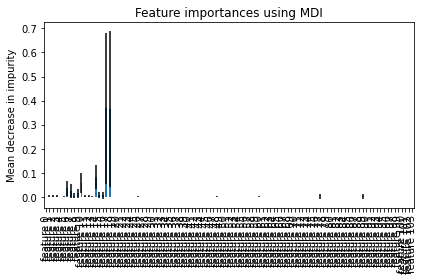

In [247]:
print(grid.best_estimator_.feature_importances_)
importances = grid.best_estimator_.feature_importances_
feature_names = [f"feature {i}" for i in range(X_test.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [248]:
best_rmse.append((np.sqrt(-grid.best_score_)))

In [249]:
import xgboost as xg
xboost = xg.XGBRegressor()
#what is xgbfrregressor


In [250]:

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [200, 500, 800]}

xgb_grid = model_selection.GridSearchCV(xboost,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=100,
                        scoring = 'neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
[11:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 500, 800], 'nthread': [4],
                         'objective': ['reg:linear']},
             scoring='neg_mean_squared_error', verbose=100)

In [251]:
best_rmse.append(np.sqrt(-xgb_grid.best_score_))

In [252]:
best_np_GHGE = np.array(best_rmse)
par_rapport_a_moyenne_GHGE = (best_np_GHGE / np.mean(Y)) * 100

In [253]:
selection_model_GHGE = pd.DataFrame(list(zip(*[list_model, best_rmse, par_rapport_a_moyenne_GHGE])), columns = ['model_s', 'root_mean_squared_error', 'error from mean'])
display(selection_model_GHGE)

,model_s,root_mean_squared_error,error from mean
0,ridge,0.164734,22.693716
1,lasso,0.241277,33.238276
2,elasticnet,0.165369,22.781220
3,randomforest,0.164803,22.703190
4,Xgboost,0.163367,22.505349


In [254]:
selection_model_GHGE.to_csv('/content/gdrive/My Drive/projet_prediction/selection_model_GHGE.csv')

#Predicting site enegy use

####Regression linéaire ridge, lasso et elasticnet


In [255]:
Y = df_regression['SiteEnergyUse(kBtu)']
#should probably take away the carbon emission intensity because we are predicting energy and carbon gas, 

In [256]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3, random_state=42)
display(X_test)

,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),...,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store
419,2016,47.64779,-122.33352,1993,1.0,1,26263,26263,26263.0,62.200001,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75,2016,47.60765,-122.34097,1909,1.0,6,51218,51218,44913.0,55.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
177,2016,47.61185,-122.34340,1918,1.0,3,38148,38148,37853.0,25.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,2016,47.62224,-122.35850,1970,1.0,5,87178,66762,66747.0,52.299999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
358,2016,47.72900,-122.34473,1990,1.0,4,41704,33120,41704.0,46.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2016,47.70349,-122.33424,1983,1.0,3,24696,18396,18396.0,33.900002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
255,2016,47.66116,-122.34172,1916,1.0,3,31774,31774,19896.0,48.400002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108,2016,47.61460,-122.34217,1952,1.0,4,26670,26670,26670.0,58.200001,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
101,2016,47.61285,-122.34817,1908,1.0,3,28800,28800,21600.0,38.400002,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
from sklearn.linear_model import LinearRegression
import math
model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)
print(mae)



0.9995899662814699
127732.10087590713
29954.467048754257


In [258]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [259]:
vec = [0.1, 0.5, 0.9, 1, 10, 30, 50, 75, 100, 130, 150, 200, 300, 400, 500, 1000, 2000, 10000]

In [260]:
ridge_mse_score = []
ridge_mae_score = []
ridge_adj_r2 = []
from sklearn.model_selection import cross_validate
for i in np.arange(1, 10000, 100):
  print(i)
  model = Ridge(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  ridge_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  ridge_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  ridge_adj_r2.append(np.mean(cv_results['test_r2']))
  




1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901


In [261]:
list_model = ['ridge', 'lasso', 'elasticnet', 'randomforest', 'Xgboost']
best_rmse = []
best_mae = []

In [262]:
ridge_mae = []
for i in ridge_mae_score:
  ridge_mae.append(-i)
ridge_rmse = []
for i in ridge_mse_score:
  ridge_rmse.append(np.sqrt(-i))
ridge_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), ridge_mae, ridge_rmse, ridge_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [263]:
display(ridge_scores_cv)

,alpha,mean absolute error,root_mean_squared_error,rsquared
0,1,12735.613632,20166.540045,0.999374
1,101,13560.599662,23537.221412,0.999109
2,201,14188.289942,25305.720500,0.998958
3,301,14638.744180,26499.579833,0.998850
4,401,14928.662866,27516.177290,0.998756
...,...,...,...,...
95,9501,19930.752322,52510.186235,0.995583
96,9601,19949.795783,52581.102109,0.995571
97,9701,19968.511656,52650.905241,0.995559
98,9801,19986.908137,52719.622244,0.995548


In [264]:
best_rmse.append(min(ridge_rmse))
best_mae.append(min(ridge_mae))

In [265]:
lasso_mse_score = []
lasso_mae_score = []
lasso_adj_r2 = []
for i in np.arange(1, 10000, 100):
  print(i)
  model = Lasso(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  lasso_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  lasso_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  lasso_adj_r2.append(np.mean(cv_results['test_r2']))

1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.407e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.145e+10, tolerance: 1.758e+10

101
201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.721e+10, tolerance: 1.758e+10

301
401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.766e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.972e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.363e+10, tolerance: 1.610e+10

501
601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.680e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.080e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+10, tolerance: 1.687e+10

701
801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.563e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.392e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.562e+10, tolerance: 1.758e+10

901
1001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.097e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.898e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+10, tolerance: 1.687e+10

1101
1201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.944e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.822e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.969e+10, tolerance: 1.758e+10

1301
1401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.917e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.141e+10, tolerance: 1.597e+10

1501
1601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.350e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.474e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.620e+10, tolerance: 1.610e+10

1701
1801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.647e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.375e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.588e+10, tolerance: 1.687e+10

1901
2001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.679e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.660e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.774e+10, tolerance: 1.758e+10

2101
2201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.968e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.793e+10, tolerance: 1.587e+10

2301
2401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.164e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.253e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.098e+10, tolerance: 1.587e+10

2501
2601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.346e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.198e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.300e+10, tolerance: 1.687e+10

2701
2801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.473e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.557e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.621e+10, tolerance: 1.758e+10

2901
3001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.711e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.593e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.645e+10, tolerance: 1.687e+10

3101
3201
3301


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.815e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.939e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.978e+10, tolerance: 1.758e+10

3401
3501


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.223e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.074e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.066e+10, tolerance: 1.687e+10

3601
3701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.232e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.400e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.406e+10, tolerance: 1.758e+10

3801
3901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.490e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.490e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.610e+10, tolerance: 1.610e+10

4001
4101


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.633e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.557e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+10, tolerance: 1.597e+10

4201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.637e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.840e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.816e+10, tolerance: 1.758e+10

4301
4401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.717e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.925e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e+10, tolerance: 1.758e+10

4501
4601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.053e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.166e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.085e+10, tolerance: 1.587e+10

4701
4801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.262e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.109e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.327e+10, tolerance: 1.597e+10

4901
5001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.263e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.460e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.433e+10, tolerance: 1.758e+10

5101
5201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.514e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.507e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.617e+10, tolerance: 1.610e+10

5301


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.762e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.781e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.564e+10, tolerance: 1.687e+10

5401
5501


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.865e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.639e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.660e+10, tolerance: 1.597e+10

5601
5701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.636e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.865e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.973e+10, tolerance: 1.610e+10

5801
5901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.932e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.070e+10, tolerance: 1.758e+10

6001
6101


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.004e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.137e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.247e+10, tolerance: 1.610e+10

6201
6301


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.379e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.217e+10, tolerance: 1.687e+10

6401
6501


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.288e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.189e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.396e+10, tolerance: 1.758e+10

6601
6701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.496e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.658e+10, tolerance: 1.597e+10

6801
6901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.775e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.644e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.757e+10, tolerance: 1.610e+10

7001
7101


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.767e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.822e+10, tolerance: 1.758e+10

7201
7301


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.880e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+11, tolerance: 1.610e+10

7401
7501


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+11, tolerance: 1.758e+10

7601
7701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.162e+11, tolerance: 1.587e+10

7801
7901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+11, tolerance: 1.758e+10

8001
8101


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+11, tolerance: 1.587e+10

8201
8301


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+11, tolerance: 1.610e+10

8401
8501


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+11, tolerance: 1.687e+10

8601
8701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+11, tolerance: 1.758e+10

8801
8901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+11, tolerance: 1.597e+10

9001
9101


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+11, tolerance: 1.610e+10

9201
9301


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+11, tolerance: 1.610e+10

9401
9501


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+11, tolerance: 1.597e+10

9601
9701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+11, tolerance: 1.610e+10

9801
9901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+11, tolerance: 1.610e+10

In [266]:
lasso_mae = []
for i in lasso_mae_score:
  lasso_mae.append(-i)
lasso_rmse = []
for i in lasso_mse_score:
  lasso_rmse.append(np.sqrt(-i))
lasso_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), lasso_mae, lasso_rmse, lasso_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [267]:
best_rmse.append(min(lasso_rmse))
best_mae.append(min(lasso_mae))

In [268]:
alpha_en = np.linspace(1, 100, num = 100)
l1_ratio_en = np.linspace(0, 1, num = 100)


In [269]:
print(alpha_en.dtype, l1_ratio_en.dtype)

float64 float64


In [270]:
param_grid = {'alpha' : alpha_en,
    'l1_ratio' : l1_ratio_en
}

In [271]:
print(alpha_en, l1_ratio_en)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.] [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343

In [272]:
print(alpha_en, l1_ratio_en)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.] [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343

In [273]:
from sklearn import linear_model
from sklearn import model_selection

elasticnet = linear_model.ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid, cv = 5, scoring='neg_mean_squared_error', n_iter= 1000)


In [274]:
clf.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.195e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=1000,
                   param_distributions={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,...
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   scoring='neg_mean_square

In [275]:
clf.best_params_

{'l1_ratio': 0.9595959595959597, 'alpha': 1.0}

In [276]:
best_rmse.append((np.sqrt(-clf.best_score_)))

##Non linéaire

In [277]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [278]:
print(np.sqrt(mean_squared_error(y_test, pred)))

285640.5060669871


In [279]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,100, 200,300],
            "max_features"      : ["auto", "sqrt", "log2"], 
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False], #ca veut dire quoi
            }
grid = model_selection.GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

print(grid.best_score_, grid.best_params_)
grid.best_params_



-8618281596.976147 {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

[0.00000000e+00 4.19194853e-04 5.08732667e-04 4.10507883e-04
 1.07179200e-05 1.80656583e-04 5.13547670e-04 4.07737805e-04
 2.80789013e-04 4.95377887e-03 3.26613132e-04 1.80565165e-03
 5.68510856e-04 9.82847785e-01 1.75116758e-06 2.62206060e-03
 2.16618742e-03 3.74135845e-04 4.35080694e-04 7.67911424e-06
 8.22083480e-06 1.00519978e-05 1.36410568e-06 4.19635514e-07
 1.83955632e-05 3.07539020e-06 2.33759174e-06 3.38796978e-06
 1.43889036e-06 2.40354192e-05 6.01631026e-07 1.31096840e-04
 8.91779280e-06 0.00000000e+00 6.54012252e-06 6.96363541e-06
 2.58457065e-05 9.08048930e-06 4.93772394e-06 4.85983573e-06
 8.71661368e-07 3.34894638e-05 2.87883823e-05 8.77379033e-07
 1.36616543e-05 2.09025662e-05 1.61341204e-06 1.47865867e-05
 2.32000725e-05 1.12256138e-05 3.83442949e-07 5.93223681e-06
 9.52016269e-05 1.56881450e-05 9.32028609e-08 1.47761807e-06
 9.82419610e-07 0.00000000e+00 6.36950811e-12 9.00085123e-07
 2.49003065e-05 5.63932310e-07 4.06092151e-06 1.94783183e-05
 0.00000000e+00 1.626187

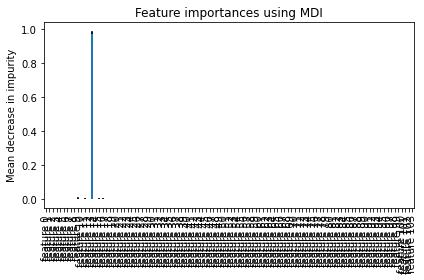

In [280]:
print(grid.best_estimator_.feature_importances_)
importances = grid.best_estimator_.feature_importances_
feature_names = [f"feature {i}" for i in range(X_test.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [281]:
best_rmse.append((np.sqrt(-grid.best_score_)))

In [282]:
import xgboost as xg
xboost = xg.XGBRegressor()
#what is xgbfrregressor


In [283]:

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [200, 500, 800]}

xgb_grid = model_selection.GridSearchCV(xboost,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=100,
                        scoring = 'neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
[11:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 500, 800], 'nthread': [4],
                         'objective': ['reg:linear']},
             scoring='neg_mean_squared_error', verbose=100)

In [284]:
best_rmse.append(np.sqrt(-xgb_grid.best_score_))

In [285]:
best_np = np.array(best_rmse)
par_rapport_a_moyenne = (best_np / np.mean(Y)) * 100


In [286]:
selection_model_site_energy_use = pd.DataFrame(list(zip(*[list_model, best_rmse, par_rapport_a_moyenne])), columns = ['model_s', 'root_mean_squared_error', 'mean percentage'])
display(selection_model_site_energy_use)

,model_s,root_mean_squared_error,mean percentage
0,ridge,20166.540045,1.325754
1,lasso,20637.523726,1.356717
2,elasticnet,20585.853488,1.353320
3,randomforest,92834.700393,6.102981
4,Xgboost,80072.538797,5.263993


In [287]:
selection_model_site_energy_use.to_csv('/content/gdrive/My Drive/projet_prediction/selection_model_site_energy_use.csv')